<a href="https://colab.research.google.com/github/dorothyomare/AUTOLIB-ANALYSIS/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_06_DOROTHY_OMARE_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline 

# loading the dataset

In [ ]:
autolib = pd.read_csv('/content/Autolib_dataset (2).csv')

# Previewing the dataset

In [ ]:
autolib.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


# validity of the data


In [ ]:
#removing the Bluecar counter because it has the same data as Cars
#removing the year column because the year is 2018 for all entries
#removing the month column because the month is 4 for all entries
auto_lib = autolib.drop(['Cars','Geo point','Status'],axis=1) 
auto_lib

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,NaN,2,station,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,75007,Paris/Bac/142,operational,NaN,4,station,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,nonexistent,2018,4,4,17,27


# combining the year,month and day columns to date


In [ ]:
import datetime as dt
date = pd.to_datetime(auto_lib[["year", "month", "day"]])
date
auto_lib['date'] = date
auto_lib

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Subscription status,year,month,day,hour,minute,date
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,nonexistent,2018,4,8,11,43,2018-04-08
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,nonexistent,2018,4,6,7,24,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,nonexistent,2018,4,3,20,14,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,nonexistent,2018,4,4,4,37,2018-04-04
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,nonexistent,2018,4,8,17,23,2018-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,nonexistent,2018,4,6,11,26,2018-04-06
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,NaN,2,station,nonexistent,2018,4,4,16,56,2018-04-04
4997,142 rue du Bac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,75007,Paris/Bac/142,operational,NaN,4,station,nonexistent,2018,4,1,7,1,2018-04-01
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,nonexistent,2018,4,4,17,27,2018-04-04


# combining hour and minute to time

In [ ]:
time = (pd.to_datetime(auto_lib['hour'].astype(str) + ':' + auto_lib['minute'].astype(str), format='%H:%M')
          .dt.time)
auto_lib['time'] = time 
auto_lib

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Subscription status,year,month,day,hour,minute,date,time
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,nonexistent,2018,4,8,11,43,2018-04-08,11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,nonexistent,2018,4,6,7,24,2018-04-06,07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,nonexistent,2018,4,3,20,14,2018-04-03,20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,nonexistent,2018,4,4,4,37,2018-04-04,04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,nonexistent,2018,4,8,17,23,2018-04-08,17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,nonexistent,2018,4,6,11,26,2018-04-06,11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,NaN,2,station,nonexistent,2018,4,4,16,56,2018-04-04,16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,75007,Paris/Bac/142,operational,NaN,4,station,nonexistent,2018,4,1,7,1,2018-04-01,07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,nonexistent,2018,4,4,17,27,2018-04-04,17:27:00


# completeness of the dataframe

In [ ]:
# checking for nulls
auto_lib.isnull()
# sum of null values
auto_lib.isnull().sum()

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
date                      0
time                      0
dtype: int64

# Dealing with the missing values

In [ ]:
# remove the columns with missing values because they wii not affect the output
autolib_nomissing = auto_lib.dropna(axis=1)
autolib_nomissing


,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Subscription status,year,month,day,hour,minute,date,time
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,2018,4,8,11,43,2018-04-08,11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,2018,4,6,7,24,2018-04-06,07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,nonexistent,2018,4,3,20,14,2018-04-03,20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,2018,4,4,4,37,2018-04-04,04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,2018,4,8,17,23,2018-04-08,17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,3,station,nonexistent,2018,4,6,11,26,2018-04-06,11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,nonexistent,2018,4,4,16,56,2018-04-04,16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,nonexistent,2018,4,1,7,1,2018-04-01,07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,nonexistent,2018,4,4,17,27,2018-04-04,17:27:00


In [ ]:
# drop columns from year to minute
autolib_nomissing = autolib_nomissing.drop(['year','month','day','minute'], axis=1)
autolib_nomissing

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Subscription status,hour,date,time
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08,11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06,07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,nonexistent,20,2018-04-03,20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,4,2018-04-04,04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,17,2018-04-08,17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,3,station,nonexistent,11,2018-04-06,11:26:00
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,2,station,nonexistent,16,2018-04-04,16:56:00
4997,142 rue du Bac,1,0,0,1,operational,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,4,station,nonexistent,7,2018-04-01,07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,nonexistent,17,2018-04-04,17:27:00


# checking if the missing values have been dropped

In [ ]:
autolib_nomissing.isnull().sum()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Subscription status    0
hour                   0
date                   0
time                   0
dtype: int64

# consistency check

In [ ]:
# checking if there are any duplicates
autolib_nomissing.duplicated().sum()
# there are no duplicates

0

# uniformity check

In [ ]:
#check the info of the dataframe
autolib_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Bluecar counter      5000 non-null   int64         
 2   Utilib counter       5000 non-null   int64         
 3   Utilib 1.4 counter   5000 non-null   int64         
 4   Charge Slots         5000 non-null   int64         
 5   Charging Status      5000 non-null   object        
 6   City                 5000 non-null   object        
 7   ID                   5000 non-null   object        
 8   Kind                 5000 non-null   object        
 9   Postal code          5000 non-null   int64         
 10  Public name          5000 non-null   object        
 11  Rental status        5000 non-null   object        
 12  Slots                5000 non-null   int64         
 13  Station type         5000 non-nul

In [ ]:
# converting datetime to int or float

dateup = autolib_nomissing['date'].astype(np.int64)
dateup


0       1523145600000000000
1       1522972800000000000
2       1522713600000000000
3       1522800000000000000
4       1523145600000000000
               ...         
4995    1522972800000000000
4996    1522800000000000000
4997    1522540800000000000
4998    1522800000000000000
4999    1523145600000000000
Name: date, Length: 5000, dtype: int64

# checking for outliers

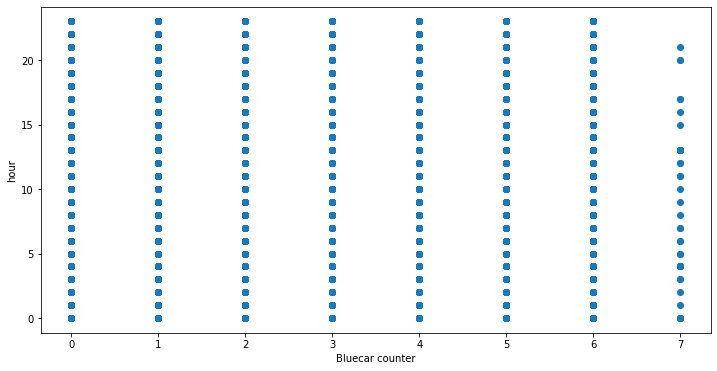

In [ ]:
# using scatter
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(autolib_nomissing['Bluecar counter'], autolib_nomissing['hour'])
ax.set_xlabel('Bluecar counter')
ax.set_ylabel('hour')
plt.show()

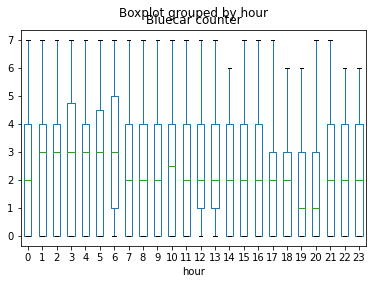

In [ ]:
#using boxplot
autolib_nomissing.boxplot(column =['Bluecar counter'], by ='hour', grid = False)

there are no outliers in this dataframe

# Analysis

*   What is the most popular time for returning cars?




In [ ]:
autolib_nomissing['time'].value_counts()

10:55:00    10
05:52:00    10
16:31:00    10
18:44:00    10
22:29:00    10
            ..
17:24:00     1
19:47:00     1
15:38:00     1
22:18:00     1
18:02:00     1
Name: time, Length: 1394, dtype: int64

# the most popular hour for returning cars

In [ ]:
autolib_nomissing['hour'].value_counts()

21    237
9     221
16    220
7     219
6     219
3     218
2     218
13    213
8     211
5     211
11    210
18    210
19    208
14    207
20    202
23    201
12    200
15    200
4     199
17    198
22    196
1     194
10    194
0     194
Name: hour, dtype: int64

# What station is the most popular?

In [ ]:
autolib_nomissing['ID'].value_counts()

paris-portedemontrouge-8      13
paris-grenelle31-parking      11
paris-mathis-35               11
paris-voltaire-182            11
paris-courcelles-69           11
                              ..
argenteuil-bicheret-4          1
villejuif-jeanjaures-153       1
boiscolombes-jeanmermoz-10     1
nanterre-national-134          1
meudon-ponceau-2               1
Name: ID, Length: 1105, dtype: int64

most popular station at the most picking hour

In [ ]:
#autolib_nomissing['ID'].where('hour'==21)
autolib_nomissing['ID'].where(autolib_nomissing['hour']==21)




0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4995    NaN
4996    NaN
4997    NaN
4998    NaN
4999    NaN
Name: ID, Length: 5000, dtype: object

In [ ]:
#which was the most popular day to return the cars

autolib_nomissing['date'].value_counts()

2018-04-01    584
2018-04-05    584
2018-04-03    583
2018-04-09    578
2018-04-04    576
2018-04-08    551
2018-04-02    545
2018-04-06    542
2018-04-07    457
Name: date, dtype: int64

# postal code most popular for picking up blue cars

In [ ]:
autolib_nomissing['Postal code'].value_counts()

75015    274
75016    236
75017    221
75011    180
75020    169
        ... 
93300      5
92110      4
91400      4
93310      4
94100      2
Name: Postal code, Length: 107, dtype: int64